In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 11.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
df = pd.concat((train.drop(columns = "Transported"), test))
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [233]:
df.shape

(12970, 13)

### DATA CLEANING

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [235]:
df.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [236]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


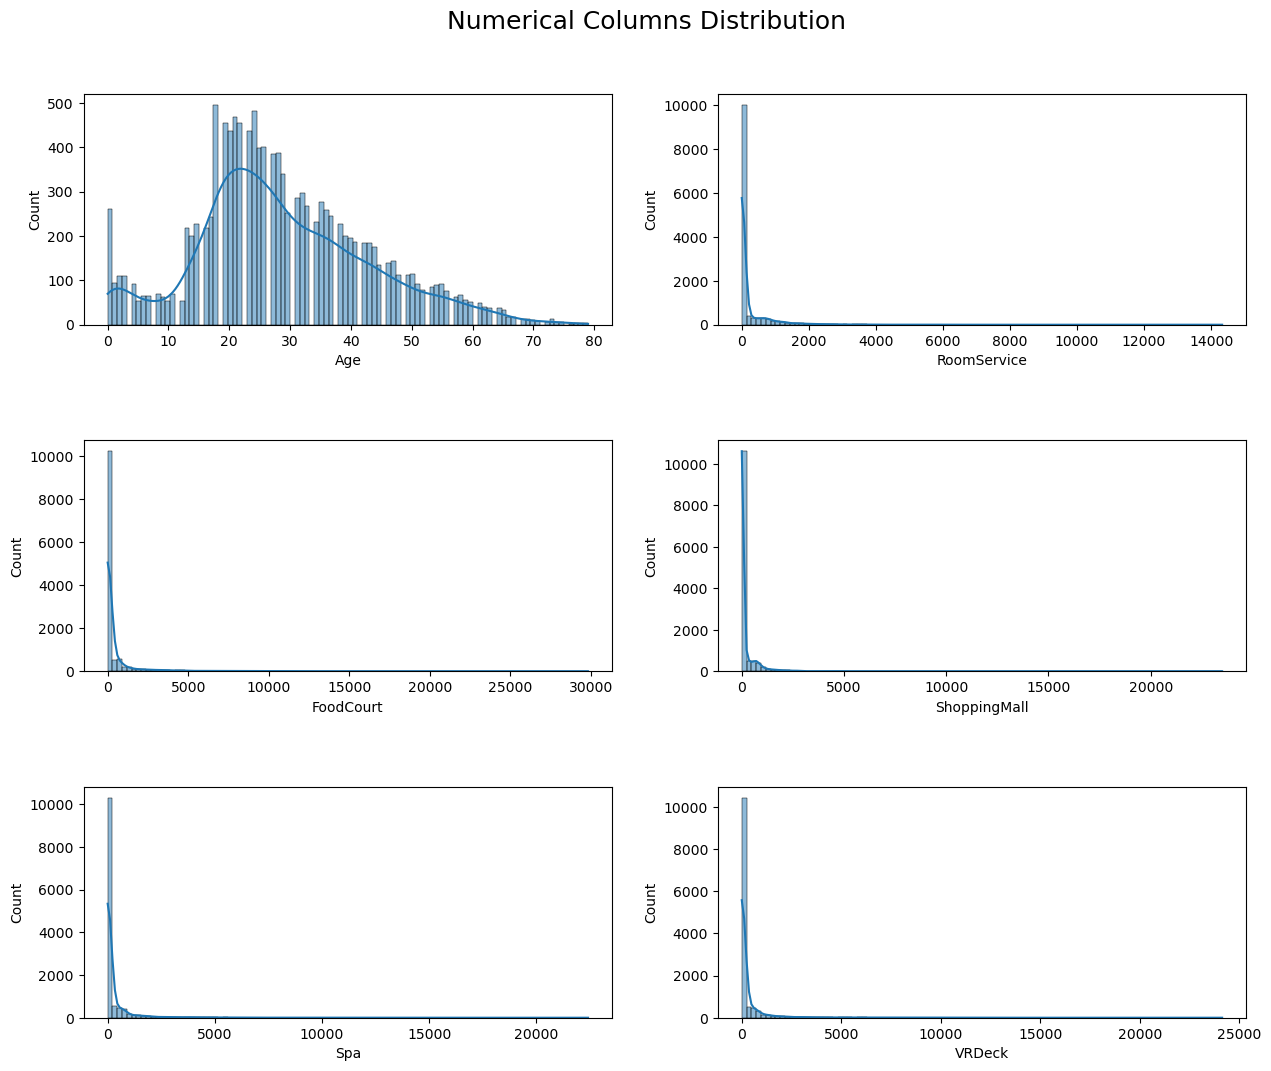

In [237]:
numerical_columns = ["Age", "RoomService", "FoodCourt","ShoppingMall", "Spa" ,"VRDeck"]
figs, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
figs.suptitle("Numerical Columns Distribution", fontsize=18, y=0.95)
for column, ax in zip(numerical_columns, axes.ravel()):
    sns.histplot(df[column], kde = True, bins = 100, ax = ax)

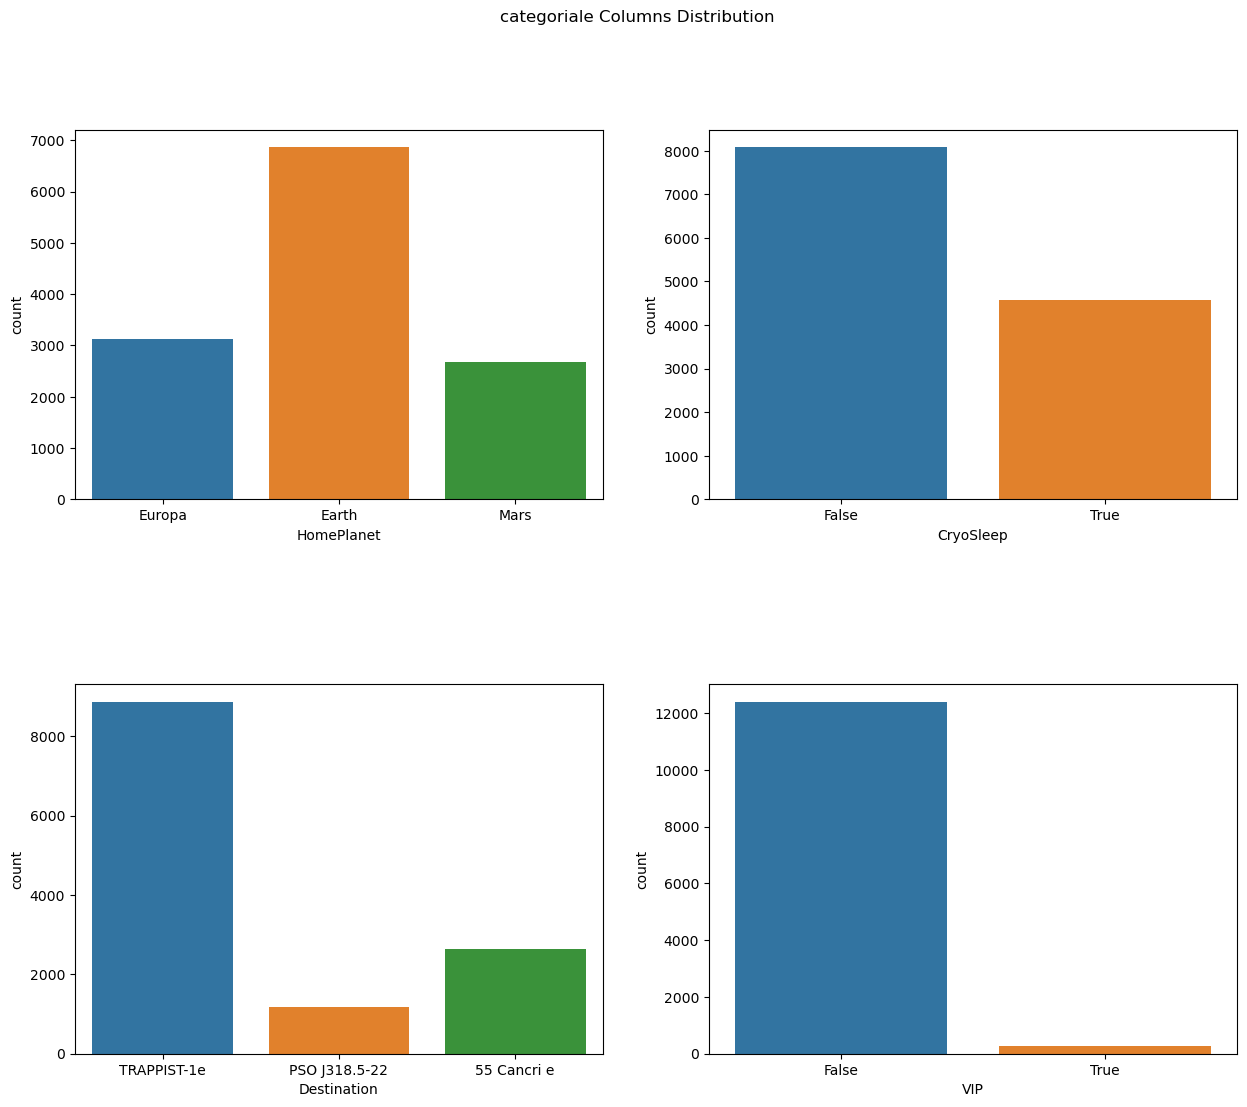

In [238]:
catgorial_columns = ["HomePlanet","CryoSleep","Destination", "VIP"]
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
figs.suptitle("categoriale Columns Distribution")
for column, ax in zip(catgorial_columns, axes.ravel()):
    sns.countplot(x = column,  data = df,ax = ax)

In [239]:
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic


In [240]:
df.tail(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4257,9238_04,Earth,False,G/1501/P,TRAPPIST-1e,26.0,False,882.0,2.0,0.0,0.0,0.0,Marlie Emenez
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4259,9238_06,Earth,False,G/1501/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Blance Garnettiz
4260,9238_07,Earth,False,F/1890/P,TRAPPIST-1e,32.0,False,115.0,0.0,2156.0,486.0,0.0,Camie Emenez
4261,9240_01,Earth,False,E/594/P,TRAPPIST-1e,15.0,False,0.0,0.0,4.0,0.0,618.0,Glendy Reenon
4262,9243_01,Europa,False,E/596/P,TRAPPIST-1e,35.0,False,0.0,4813.0,0.0,142.0,523.0,Sollum Pumpeshaft
4263,9245_01,Earth,False,F/1791/S,TRAPPIST-1e,20.0,False,1272.0,3.0,543.0,0.0,0.0,Eriana Jenkinnedy
4264,9249_01,Earth,False,G/1492/S,TRAPPIST-1e,21.0,False,147.0,603.0,20.0,0.0,0.0,Hilip Lambles
4265,9255_01,Mars,False,F/1794/S,TRAPPIST-1e,32.0,False,46.0,3.0,1258.0,0.0,0.0,Skies Bota
4266,9258_01,Europa,True,E/598/P,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Beidus Siveduced


In [241]:
df[df["HomePlanet"] == "Earth"][["Cabin"]].mode()

,Cabin
0,G/160/P
1,G/734/S


In [242]:
df[df["HomePlanet"] == "Mars"][["Cabin"]].mode()

,Cabin
0,D/176/S
1,D/273/S
2,E/13/S


In [243]:
df[df["HomePlanet"] == "Europa"][["Cabin"]].mode()

,Cabin
0,B/11/S
1,B/201/P
2,B/31/P
3,B/82/S
4,C/137/S
5,C/21/P


In [244]:
df.groupby(by = "HomePlanet", group_keys=True).apply(lambda x: x)[["Cabin"]]

Cabin
HomePlanet               
Earth      1        F/0/S
           4        F/1/S
           5        F/0/P
           6        F/2/S
           7        G/0/S
...                   ...
Mars       4249       NaN
           4251   E/605/S
           4265  F/1794/S
           4270   D/278/S
           4274   D/296/P

[12682 rows x 1 columns]

In [245]:
#replace nan values in numerical columns
for column in numerical_columns:
    if column == "Age":
        df[column].fillna(df[column].mean(), inplace = True) 
    else:
        df[column].fillna(df[column].median(), inplace = True)

#replace nan values in categorial columns
catgorial_columns = ["HomePlanet","CryoSleep","Cabin","Destination", "VIP", "Name"]
for column in catgorial_columns:
    df[column].fillna(method = "ffill", inplace = True)

In [246]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

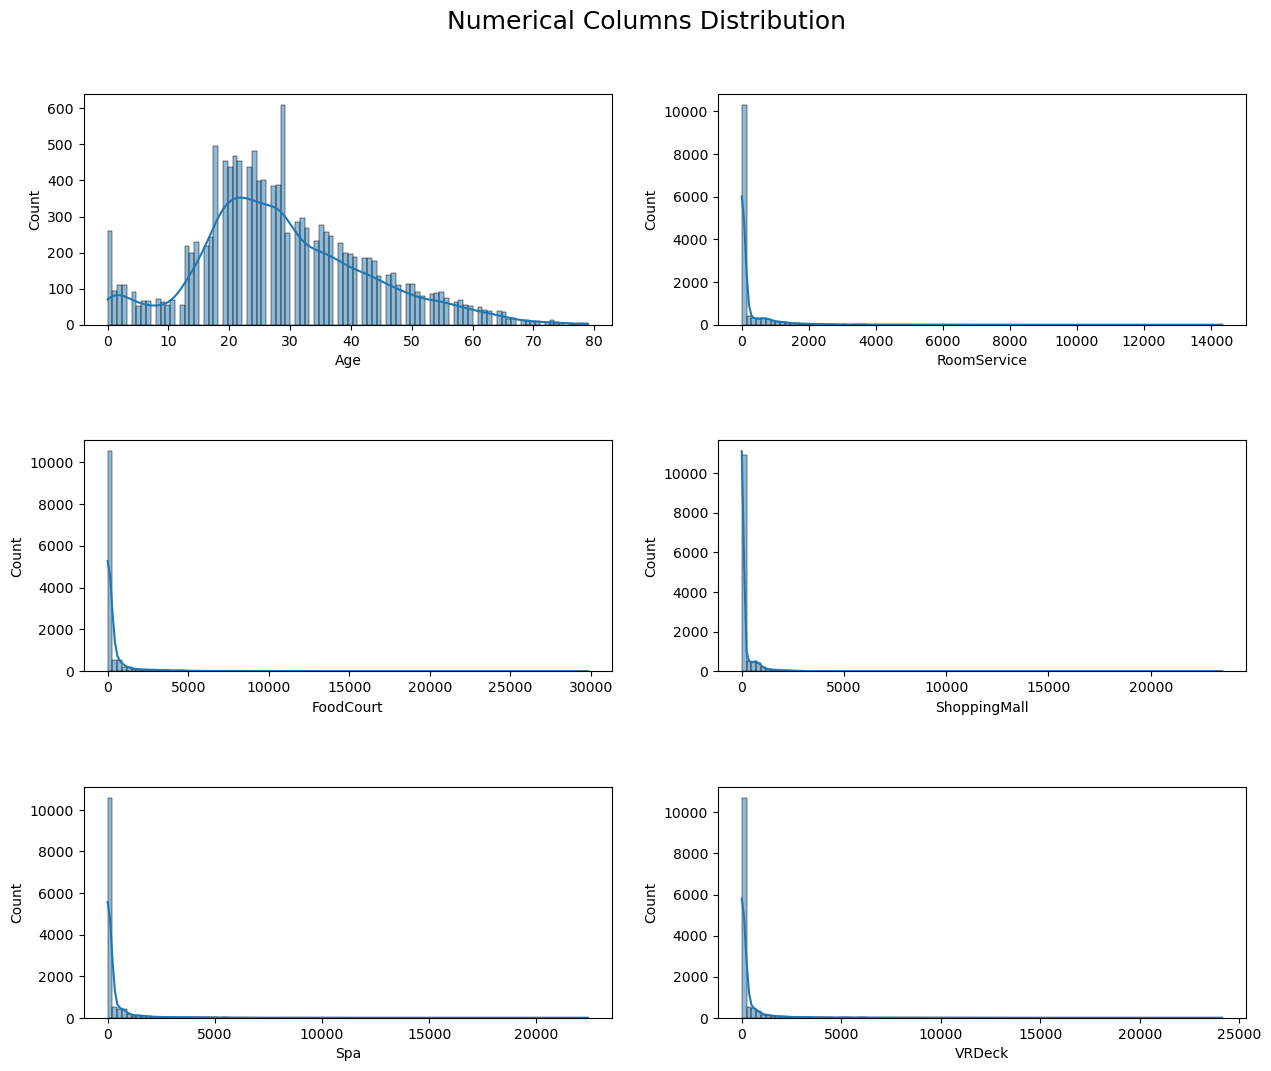

In [247]:
numerical_columns = ["Age", "RoomService", "FoodCourt","ShoppingMall", "Spa", "VRDeck"]
figs, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
figs.suptitle("Numerical Columns Distribution", fontsize=18, y=0.95)
for column, ax in zip(numerical_columns, axes.ravel()):
    sns.histplot(df[column], kde = True, bins = 100, ax = ax)

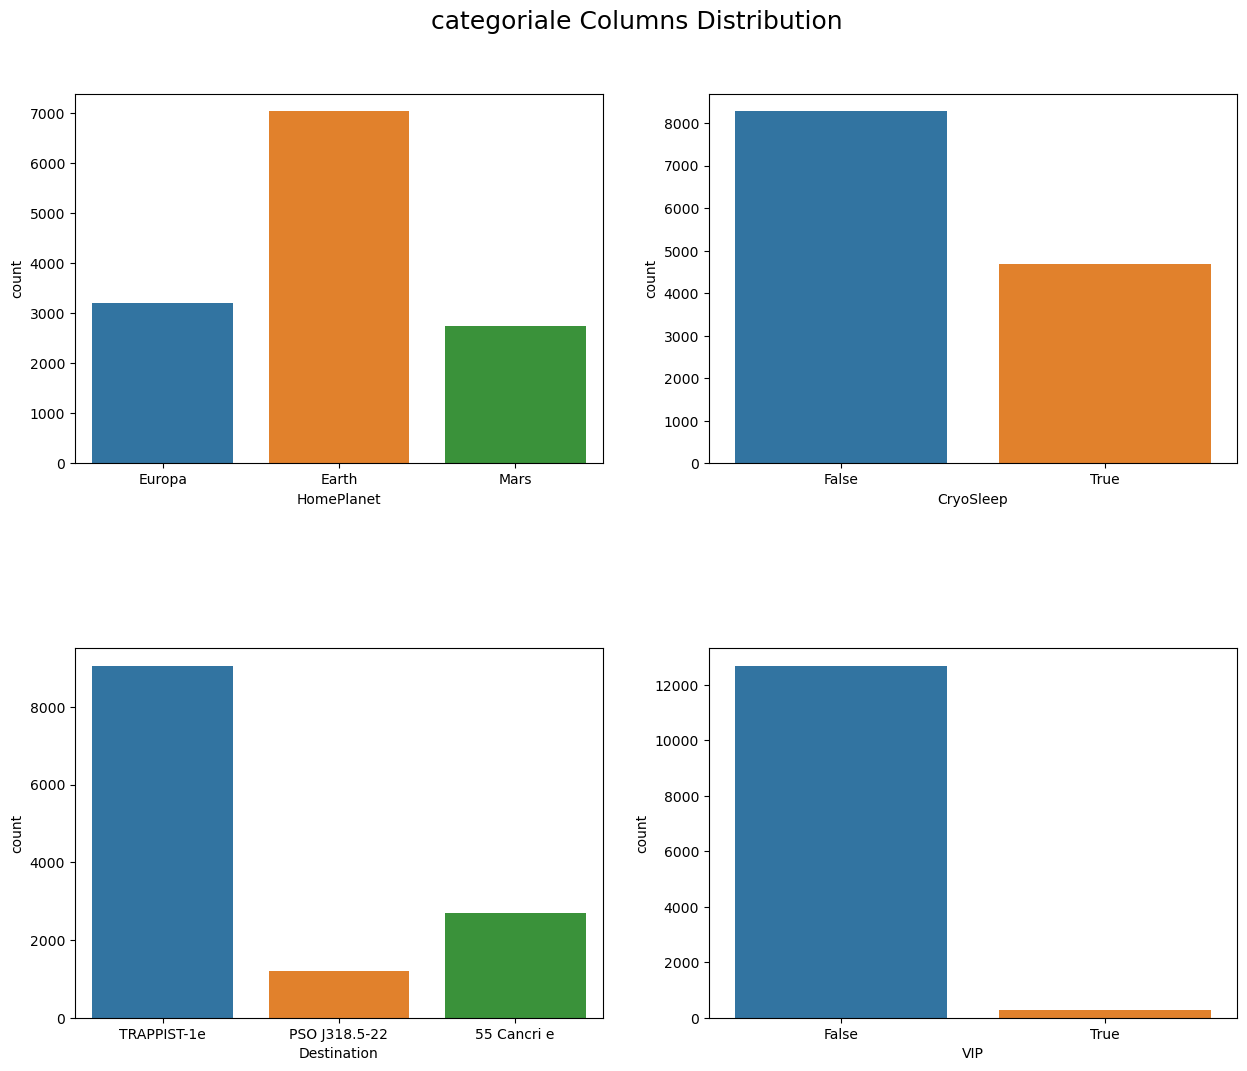

In [248]:
catgorial_columns = ["HomePlanet","CryoSleep","Destination", "VIP"]
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
figs.suptitle("categoriale Columns Distribution", fontsize=18, y=0.95)
for column, ax in zip(catgorial_columns, axes.ravel()):
    sns.countplot(x = column,  data = df,ax = ax)

### FEATURE INGIENERING

In [249]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [250]:
df["Cabin_deck"] = df["Cabin"].apply(lambda x : x.split("/")[0])
df["Cabin_num"] = df["Cabin"].apply(lambda x : x.split("/")[1])
df["Cabin_side"] = df["Cabin"].apply(lambda x : x.split("/")[2])

In [251]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S


In [252]:
df.drop(columns = ["PassengerId", "Cabin"], inplace = True)

In [253]:
df["Cabin_side"].replace(["P","S"], [0,1], inplace = True)
df["VIP"].replace([False,True], [0,1], inplace = True)
df["CryoSleep"].replace([False,True], [0,1], inplace = True)

In [254]:
df["SameFamily"] = df["Name"].apply(lambda x: x.split(" ")[1])

In [255]:
df["Travel_Alone"] = df["SameFamily"].apply(lambda x: True if (df["SameFamily"].value_counts()[x]==1) else False)

In [256]:
df.drop(columns = ["Name", "SameFamily"], inplace = True)
df["Travel_Alone"].replace([False,True], [0,1], inplace = True)

In [257]:
df["Cabin_num"] = df["Cabin_num"].astype(np.number)

In [258]:
df["Total price"] = df["RoomService"]+df["FoodCourt"]+df["ShoppingMall"]+df["Spa"]+df["VRDeck"]

In [259]:
df1 = df.copy()
df1 = pd.get_dummies(df1)

<Axes: >

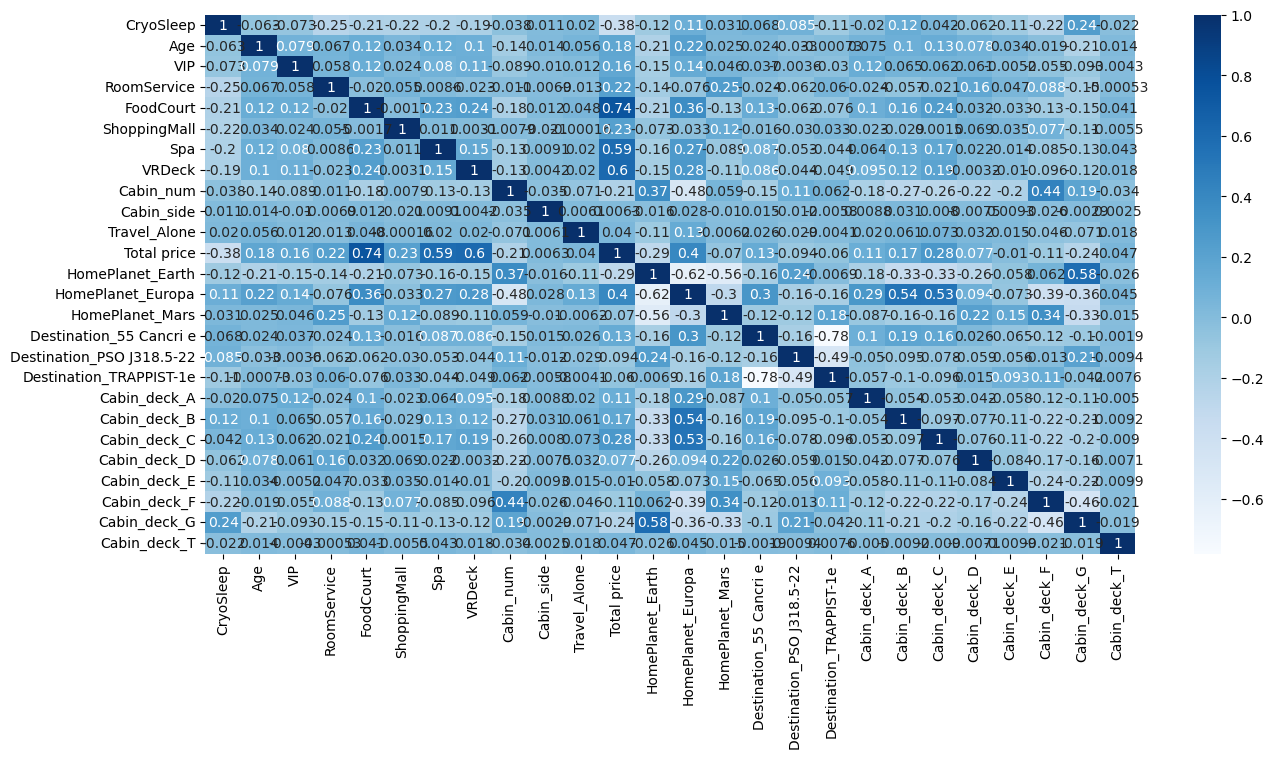

In [261]:
plt.figure(figsize = (15, 7))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True)

In [260]:
df1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Cabin_side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,1,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,0,1,0,0,0,0,0,1,0,0


In [279]:
x_train = df1.iloc[:len(train), :]
x_train["Transported"] = train['Transported'].map({False: 0, True: 1})

x_train.head()

/tmp/ipykernel_32/52375817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Transported"] = train['Transported'].map({False: 0, True: 1})


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Cabin_side,...,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,1,...,1,0,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,1,...,1,1,0,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,1,...,1,1,0,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,1,0,0,0,0,0,1,0,0,1


In [280]:
x_train.shape

(8693, 27)

In [303]:
x_test = df1.iloc[len(train):, :].reset_index(drop = True)
x_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Cabin_side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4.0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1.0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,1,...,0,1,0,0,0,0,0,1,0,0


In [278]:
x_test.shape

(4277, 15)

In [282]:
x_test_ids = test["PassengerId"]
x_test_ids

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

### PREDICT

In [283]:
# import pycaret classification and init setup

from pycaret.classification import *

s = setup(x_train, 
          target='Transported', 
          normalize=True, 
          fold=5)

,Description,Value
0,Session id,3205
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 27)"
4,Transformed data shape,"(8693, 27)"
5,Transformed train set shape,"(6085, 27)"
6,Transformed test set shape,"(2608, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [287]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8128,0.9058,0.8186,0.8117,0.8150,0.6256,0.6259,4.6260
lightgbm,Light Gradient Boosting Machine,0.8090,0.8997,0.8039,0.8147,0.8092,0.6181,0.6183,0.8620
gbc,Gradient Boosting Classifier,0.8049,0.8957,0.8310,0.7920,0.8110,0.6097,0.6105,0.6940
xgboost,Extreme Gradient Boosting,0.7979,0.8944,0.7853,0.8080,0.7964,0.5958,0.5961,0.6440
rf,Random Forest Classifier,0.7928,0.8789,0.7576,0.8176,0.7864,0.5857,0.5874,0.7220
ada,Ada Boost Classifier,0.7901,0.8768,0.8333,0.7694,0.8000,0.5800,0.5821,0.3620
lr,Logistic Regression,0.7883,0.8758,0.8062,0.7810,0.7933,0.5765,0.5771,0.9700
et,Extra Trees Classifier,0.7883,0.8639,0.7533,0.8129,0.7819,0.5769,0.5785,0.6600
svm,SVM - Linear Kernel,0.7793,0.0000,0.7892,0.7771,0.7823,0.5585,0.5599,0.0800
knn,K Neighbors Classifier,0.7726,0.8489,0.7651,0.7796,0.7722,0.5451,0.5453,0.1560


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [288]:
model = compare_models(sort = "F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8128,0.9058,0.8186,0.8117,0.8150,0.6256,0.6259,0.1580
gbc,Gradient Boosting Classifier,0.8049,0.8957,0.8310,0.7920,0.8110,0.6097,0.6105,0.3520
lightgbm,Light Gradient Boosting Machine,0.8090,0.8997,0.8039,0.8147,0.8092,0.6181,0.6183,0.2120
ada,Ada Boost Classifier,0.7901,0.8768,0.8333,0.7694,0.8000,0.5800,0.5821,0.3280
xgboost,Extreme Gradient Boosting,0.7979,0.8944,0.7853,0.8080,0.7964,0.5958,0.5961,0.1900
lr,Logistic Regression,0.7883,0.8758,0.8062,0.7810,0.7933,0.5765,0.5771,0.2380
rf,Random Forest Classifier,0.7928,0.8789,0.7576,0.8176,0.7864,0.5857,0.5874,0.5380
svm,SVM - Linear Kernel,0.7793,0.0000,0.7892,0.7771,0.7823,0.5585,0.5599,0.2220
et,Extra Trees Classifier,0.7883,0.8639,0.7533,0.8129,0.7819,0.5769,0.5785,0.7160
knn,K Neighbors Classifier,0.7726,0.8489,0.7651,0.7796,0.7722,0.5451,0.5453,0.3060


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [289]:
model = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8003,0.8988,0.8238,0.7891,0.8061,0.6005,0.6011
1,0.8348,0.9195,0.8499,0.8270,0.8383,0.6696,0.6699
2,0.8127,0.8982,0.7993,0.8235,0.8113,0.6254,0.6256
3,0.8102,0.9074,0.8010,0.8183,0.8096,0.6204,0.6206
4,0.8061,0.9052,0.8189,0.8006,0.8097,0.6121,0.6122
Mean,0.8128,0.9058,0.8186,0.8117,0.8150,0.6256,0.6259
Std,0.0118,0.0077,0.0184,0.0145,0.0118,0.0236,0.0235


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

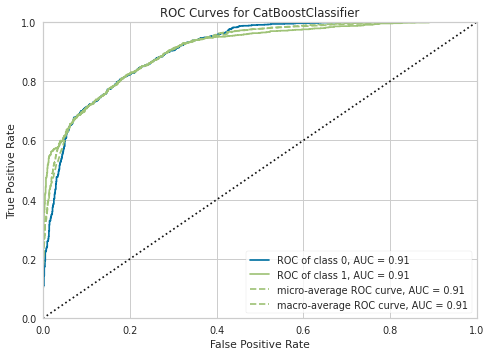

In [291]:
plot_model(model, plot = 'auc', scale=0.7)

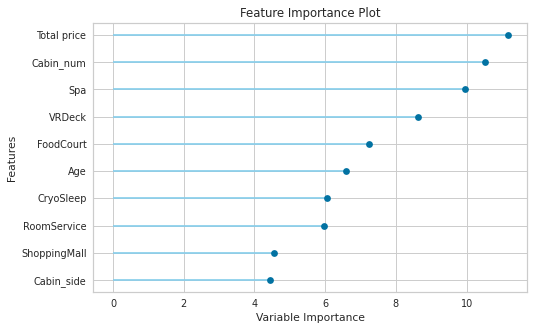

In [292]:
plot_model(model, plot = 'feature', scale=0.7)

In [294]:
model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7888,0.8903,0.7961,0.7871,0.7916,0.5776,0.5776
1,0.8299,0.9178,0.8369,0.8274,0.8321,0.6598,0.6598
2,0.8143,0.8936,0.7945,0.8296,0.8117,0.6287,0.6293
3,0.8118,0.8990,0.7928,0.8265,0.8093,0.6238,0.6243
4,0.8044,0.8938,0.8059,0.8059,0.8059,0.6089,0.6089
Mean,0.8099,0.8989,0.8052,0.8153,0.8101,0.6197,0.6200
Std,0.0134,0.0098,0.0165,0.0165,0.0130,0.0268,0.0269


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


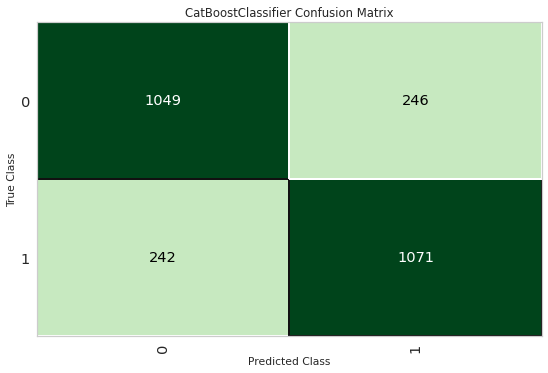

In [295]:
plot_model(model, plot = 'confusion_matrix', scale=0.7)

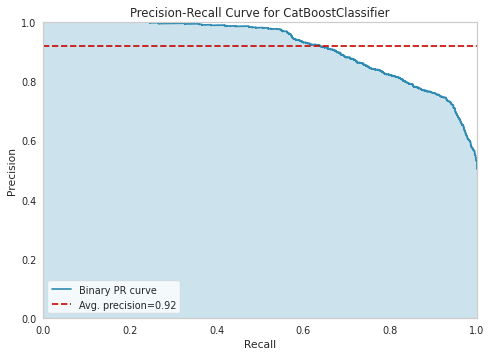

In [296]:
plot_model(model, plot = 'pr', scale=0.7)

In [304]:
pred_test = predict_model(model, data = x_test)

pred_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Cabin_side,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,prediction_label,prediction_score
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,...,0,0,0,0,0,0,1,0,1,0.5079
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4.0,1,...,0,0,0,0,0,1,0,0,0,0.9779
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0.9893
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1.0,1,...,0,0,1,0,0,0,0,0,1,0.9574
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,1,...,0,0,0,0,0,1,0,0,1,0.5729


In [305]:
x_test_ids.shape

(4277,)

In [308]:
predict = pred_test.prediction_label.astype(np.bool8)

In [309]:
predict.shape

(4277,)

In [311]:
predict_final = pd.DataFrame({"PassengerId": x_test_ids, "Transported": predict })
predict_final.to_csv('submission.csv', index = False)